Project on Hypothesis Testing:

Problem Statement -  Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 


    1.Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the             current and new golf balls. 

    2.Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your                   recommendation for Par Inc.?

    3.Provide descriptive statistical summaries of the data for each model. 
    
    4.What is the 95% confidence interval for the population mean of each model, and what is the 95% confidence interval for          the difference between the means of two populations?
    
    5. Do you see a need for larger sample sizes and more testing with the golf balls ?


In [47]:
#Include All the necessary Packagaes 

import numpy as np
from scipy.stats import ttest_1samp, ttest_ind,mannwhitneyu,levene,shapiro,wilcoxon
from statsmodels.stats.power import ttest_power
import scipy.stats as stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [48]:
#Read Golf data file in the .xls format

file = "SM4-Golf.xls"
GolfData = pd.read_excel(file)


In [49]:
## Print first 10 records

GolfData.head(10)

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262
5,283,251
6,258,262
7,266,289
8,259,286
9,270,264


In [50]:
#Print  Last 10 records

GolfData.tail(10)

,Current,New
30,281,283
31,274,250
32,273,253
33,263,260
34,275,270
35,267,263
36,279,261
37,274,255
38,276,263
39,262,279


In [51]:
# Understand shape and size of data 

print(GolfData.shape)

(40, 2)


There are 40 observations and 2 columns in the data file

In [52]:
#Get more information about data

GolfData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


Two column names are Current and New. Both are integer fields.

In [53]:
# Look for missing values in both the fields

GolfData.isnull().values.any()

False

Looks like there are no missing values in both the fields

In [54]:
#Get the summary of data using describe

GolfData.describe()

,Current,New
count,40.000000,40.000000
mean,270.275000,267.500000
std,8.752985,9.896904
min,255.000000,250.000000
25%,263.000000,262.000000
50%,270.000000,265.000000
75%,275.250000,274.500000
max,289.000000,289.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002524BC6AEF0>,
      dtype=object)

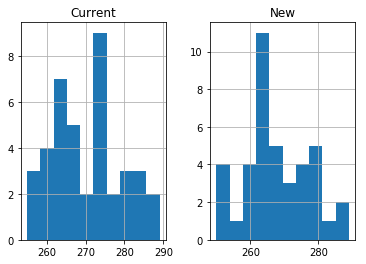

In [55]:
#Plot the distribution of both the fields using hostogram

GolfData.hist()

[array([263., 255.]), array([275.25, 289.  ])]

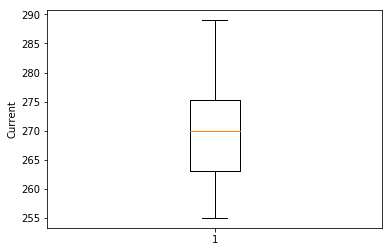

In [56]:
# Checck for the outliers in the dataset. Check CURRENT field,

B= sns.boxplot(GolfData.Current,orient="v",width=0.2,showmeans=True)
B=plt.boxplot(GolfData.Current)
[item.get_ydata() for item in B['whiskers']]

Looks like there are no ouliers in the CURRENT field.

[array([262., 250.]), array([274.5, 289. ])]

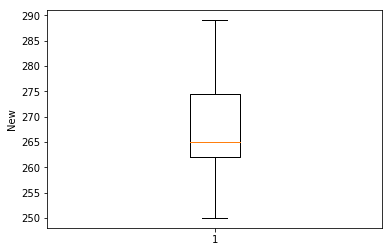

In [57]:
# Checck for the outliers in the dataset. Check NEW field,

B= sns.boxplot(GolfData.New,orient="v",width=0.2,showmeans=True)
B=plt.boxplot(GolfData.New)
[item.get_ydata() for item in B['whiskers']]

Looks like there are no ouliers in the NEW field.

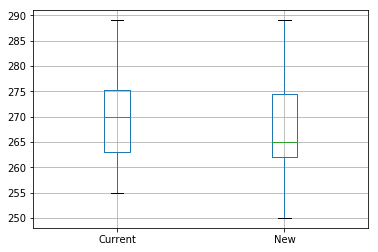

In [58]:
GolfData.boxplot()

There are no outliers in both the current and new balls.

In [59]:
#Separate CURRENT and NEW Fields into 2 groups 

Current_balls =GolfData['Current']
New_balls=GolfData['New']

Define Hypothesis based on the problem statement:

Null Hypothesis --> Driving distance(Current) <= Driving Distance(New)
Alternate Hypothesis --> Driving distance(Current) > Driving Distance(New)

If the Null hypothesis is rejected then we can conclude that introduction of new golf balls with cut-resistant, longer-lasting golf balls doesn't help them in claiming the driving diatance will improve and not recommended to introduce into the market.

Test variances in the two groups using Leven's test 

Null Hypothesis -> Variances are equal across all samples

Alternative Hypothesis -> Variances are not equal for atleast one sample

In [60]:
levene(Current_balls,New_balls)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

Pvalue > 0.05 so, we can not reject the null hypothesis i.e population variations are equal across all samples.

Shapiro test is used to test the normality of the distibution

p <= alpha: reject H0, Distribution is not normal.
p > alpha: fail to reject H0, Distibution is normal.

In [61]:
shapiro(Current_balls)

(0.9707046747207642, 0.378787100315094)

P > 0.05 meaning we can not reject the null hypothesis i.e distribution of the data is normal.

In [62]:
shapiro(New_balls)

(0.9678263664245605, 0.3064655363559723)

P > 0.05 meaning we can not reject the null hypothesis i.e distribution of the data is normal.

From above two tests, we can conclude that the both the fields data is normally distributed and variances are 
also same. Also same test is performed on both the idependent groups. So, we use unpaired independent ttest to test our 
Hypothesis formulated above i.e

Null Hypothesis --> Driving distance(Current) <= Driving Distance(New)
Alternate Hypothesis --> Driving distance(Current) > Driving Distance(New)


In [63]:
#Test whether the driving distance of current balls is less than or equal to the driving distance new golf balls and the 
# Probability we get here is a two tail probability

t_statistic,p_value = ttest_ind(Current_balls,New_balls)
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


ttest_ind gives us the 2 tailed probability but our test is right tailed so, We need to divide the probability by 2 i.e 0.1879/2 =0.0989. P > 0.05, Hence we failed to reject the null hypothesis and we can conclude that introduction of 
a cut-resistant, longer-lasting new golf balls doesn't increase the driving distance.

In [64]:
#Calculate the Power of Test. To calculate the power of test, first we need to calcualte the delta value.

Poolstd_dev = np.sqrt(((40-1)*np.var(Current_balls) + (40-1)*np.var(New_balls)) / (40+40-2))


delta= (np.mean(Current_balls) - np.mean(New_balls))/ Poolstd_dev
delta

0.3008146650775173

In [65]:
#Power of test

print(ttest_power(0.3008146650775173, nobs=40, alpha=0.05, alternative="larger"))

0.5888184232048734


Power of test shows that there is 58.8% chance that me rejecting the null hypothesis when the null hypothesis
is also false.

In [66]:
# Industry standard power of test is 80% it seems as per the website below -
# https://www.isixsigma.com/tools-templates/hypothesis-testing/using-power-test-good-hypothesis-testing/
    
# Lets test the effect of increasing sample size on the power of test 

print(ttest_power(0.3008146650775173, nobs=80, alpha=0.05, alternative="two-sided"))

0.7573403072616456


In [67]:
print(ttest_power(0.3008146650775173, nobs=70, alpha=0.05, alternative="larger"))

0.8015414197444378


As the sample size increases above 70, it will increase the power of test and it will apporach the industrail standard power of test of 80%.

Suppose if the distibution of the data is not normal then we need to use the Mannwhiteneyu test of hypothesis.

In [68]:
# Mannwhiteneyu test of hypothesis 

u, p_value = mannwhitneyu(Current_balls,New_balls,alternative="greater")
print(u, p_value)


932.0 0.10265192122893124


Here the proabability is greater than 0.5 hence we can not reject the null hypothesis.

Next step, we can culate the power of test when the variances are not equal.

In [74]:
critical= stats.t.isf(0.05,78)
critical

1.6646246444385244

In [75]:
delta_variance = critical - t_statistic 
delta_variance

0.3362630509139566

In [76]:
print(ttest_power(0.33678975980255954, nobs=40, alpha=0.05, alternative="larger"))

0.6729266607915084


Power of test shows that there is 67.29% chance that me rejecting the null hypothesis when the null hypothesis is 
also false.

In [77]:
print(ttest_power(0.33678975980255954, nobs=50, alpha=0.05, alternative="larger"))

0.7591333851873524


In [79]:
print(ttest_power(0.33678975980255954, nobs=56, alpha=0.05, alternative="larger"))

0.8007350769451606


Above tests shows that we can achieve the industry standard power of test by increasing the sample size to 56.